<a href="https://colab.research.google.com/github/tlaet/Clustering-retail/blob/master/Bellerophon_gama_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = r'/content/gdrive/MyDrive/04. Personal projects/94.data science/dasa_forecast/data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,encoding='latin-1',decimal=',',thousands='.', usecols = ['Texto breve de material',
                                                             'Material',
                                                             'Nome 1',
                                                             'Centro',
                                                             'Data de lançamento',
                                                             'Qtd.  UM registro',
                                                             'Montante em MI',
                                                             'Tipo de movimento'
                                                            ], sep=';',index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

# initialize list of lists
inventory_class = [['AX','Alto valor de consumo','Demanda estável','Previsão confiável','Automático','JIT, VMI, Consignação, transferência da resposabilidade para o fornecedor','Continuo'], 
        ['AY', 'Alto valor de consumo','Variação da demanda previsivel','Previsão menos confiável','Automático com intervenção manual','Baixo, risco de stock out aceito','Continuo'], 
        ['AZ', 'Alto valor de consumo','Demanda intermitente ou variável','Previsão ímpossivel ou não confiável','Buy to order','Nenhum','Não estocado'],
        ['BX','Médio valor de consumo','Demanda estável','Previsão confiável','Automático com intervenção manual','Baixo, risco de stock out aceito','Inspeção periódica'],
        ['BY','Médio valor de consumo','Variação da demanda previsivel','Previsão menos confiável','Automático com intervenção manual','Ajustado segundo a sazonalidade','Inspeção periódica'],
        ['BZ','Médio valor de consumo','Demanda intermitente ou variável','Previsão ímpossivel ou não confiável','Buy to order','Nenhum, cliente compreende o leadtime','Não estocado'],
        ['CX','Baixo valor de consumo','Demanda estável','Previsão confiável','Automático','Alto','Inspeção periódica'],
        ['CY','Baixo valor de consumo','Variação da demanda previsivel','Previsão menos confiável','Automático','Alto','Inspeção periódica'],
        ['CZ','Baixo valor de consumo','Demanda intermitente ou variável','Previsão ímpossivel ou não confiável','Automático','Alto','Inspeção periódica']]
  
# Create the pandas DataFrame
inventory_category = pd.DataFrame(inventory_class, columns = ['abc_xyz_class', 
                                                   'Comportamento de consumo',
                                                   'Comportamento de demanda',
                                                   'Confiabilidade da previsão',
                                                   'Modelo de abastecimento',
                                                   'Estoque de segurança',
                                                   'Controle do inventário'
                                                   ])
  
# print dataframe.
inventory_category

,abc_xyz_class,Comportamento de consumo,Comportamento de demanda,Confiabilidade da previsão,Modelo de abastecimento,Estoque de segurança,Controle do inventário
0,AX,Alto valor de consumo,Demanda estável,Previsão confiável,Automático,"JIT, VMI, Consignação, transferência da respos...",Continuo
1,AY,Alto valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático com intervenção manual,"Baixo, risco de stock out aceito",Continuo
2,AZ,Alto valor de consumo,Demanda intermitente ou variável,Previsão ímpossivel ou não confiável,Buy to order,Nenhum,Não estocado
3,BX,Médio valor de consumo,Demanda estável,Previsão confiável,Automático com intervenção manual,"Baixo, risco de stock out aceito",Inspeção periódica
4,BY,Médio valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático com intervenção manual,Ajustado segundo a sazonalidade,Inspeção periódica
5,BZ,Médio valor de consumo,Demanda intermitente ou variável,Previsão ímpossivel ou não confiável,Buy to order,"Nenhum, cliente compreende o leadtime",Não estocado
6,CX,Baixo valor de consumo,Demanda estável,Previsão confiável,Automático,Alto,Inspeção periódica
7,CY,Baixo valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático,Alto,Inspeção periódica
8,CZ,Baixo valor de consumo,Demanda intermitente ou variável,Previsão ímpossivel ou não confiável,Automático,Alto,Inspeção periódica


In [ ]:
df.isna().sum()

Material                      0
Texto breve de material       0
Centro                        0
Nome 1                     5581
Tipo de movimento             0
Data de lançamento            0
Qtd.  UM registro             0
Montante em MI                0
dtype: int64

In [ ]:
df["Qtd.  UM registro"] = df["Qtd.  UM registro"].astype("int64")
df["Qtd.  UM registro"] = abs(df["Qtd.  UM registro"])
df.rename(columns={"Qtd.  UM registro": 'Consumo'},inplace=True)

df["Tipo de movimento"] = df["Tipo de movimento"].astype("string")
df.rename(columns={'Tipo de movimento': 'Movimento'},inplace=True)

df["Texto breve de material"] = df["Texto breve de material"].astype("string")
df.rename(columns={'Texto breve de material': 'Descricao'},inplace=True)

df['Centro'] = df["Centro"].astype("string")

df["Material"] = df["Material"].astype("string")
df.rename(columns={'Material': 'Sku'},inplace=True)

df["Nome 1"] = df["Nome 1"].astype("string")
df.rename(columns={'Nome 1': 'Nome'},inplace=True)

df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'],format='%d/%m/%Y')
df.rename(columns={'Data de lançamento': 'Data'},inplace=True)

df["Montante em MI"] = df["Montante em MI"].astype("int64")
df["Montante em MI"] = abs(df["Montante em MI"])
df.rename(columns={'Montante em MI': 'Receita'},inplace=True)

In [ ]:
df['Tipo']='Unidade'

In [ ]:
df.loc[df['Nome'].str.contains('ARMAZEM'), 'Tipo'] = 'Armazém'

In [ ]:
df = df.drop(df[(df['Movimento'] !='641') & (df['Movimento'] !='642')&(df['Movimento'] !='647')& (df['Movimento'] !='648')].index)#641,647
df = df.drop(df[(df['Tipo'] =='Unidade')].index)

In [ ]:
lista_nomes_sku =df.drop(columns=['Movimento','Consumo','Receita','Data','Centro','Nome'])

In [ ]:
lista_nomes_sku = lista_nomes_sku.drop_duplicates()

In [ ]:
lista_nomes_centro = df.drop(columns=['Movimento','Consumo','Receita','Data','Sku','Descricao'])

In [ ]:
lista_nomes_centro = lista_nomes_centro.drop_duplicates()

In [ ]:
df.sort_values('Movimento', ascending=False)

,Sku,Descricao,Centro,Nome,Movimento,Data,Consumo,Receita,Tipo
10017592,10010479,TB VAC BIOQUIM HEPARI SODICA 4ML GBO,D477,ARMAZEM-BAHIA,648,2021-02-10,50,16,Armazém
2392988,20003686,LUVA LATEX PROC C/TAL P C/100,D648,ARMAZEM-FORTALEZA,648,2021-05-13,16,992,Armazém
6682779,10010681,CONTRA HENETIX300 P/TC LOBI 50ML GUERBET,D477,ARMAZEM-BAHIA,648,2020-09-18,25,560,Armazém
2870739,10013730,FILME DRY DT2 B100 C/100 25.4X30.5 AGFA,D482,ARMAZEM-CUIABÁ,648,2021-04-03,1,161,Armazém
10136922,10009415,LAM C/EXT FOSCA LAPID 26X76MM CRAL,D044,ARMAZEM-RJ,648,2021-02-04,15,79,Armazém
...,...,...,...,...,...,...,...,...,...
4670901,10010106,GAZE 9F N ESTL 7.5X7.5 C/500 M.HOUSE,D044,ARMAZEM-RJ,641,2020-07-02,4,53,Armazém
4670898,10010106,GAZE 9F N ESTL 7.5X7.5 C/500 M.HOUSE,D044,ARMAZEM-RJ,641,2020-07-03,4,53,Armazém
4670886,10010106,GAZE 9F N ESTL 7.5X7.5 C/500 M.HOUSE,D044,ARMAZEM-RJ,641,2020-07-07,12,159,Armazém
4670877,10010106,GAZE 9F N ESTL 7.5X7.5 C/500 M.HOUSE,D044,ARMAZEM-RJ,641,2020-07-08,14,186,Armazém


In [ ]:
def expand(df,date_col):
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day
    df['dayofweek'] = df[date_col].dt.dayofweek
    df['weekofyear'] = df[date_col].dt.weekofyear
    df['dayofyear'] = df[date_col].dt.dayofyear
    df['month_year'] = pd.to_datetime(df['Data']).dt.to_period('M')


In [ ]:
expand(df,'Data')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


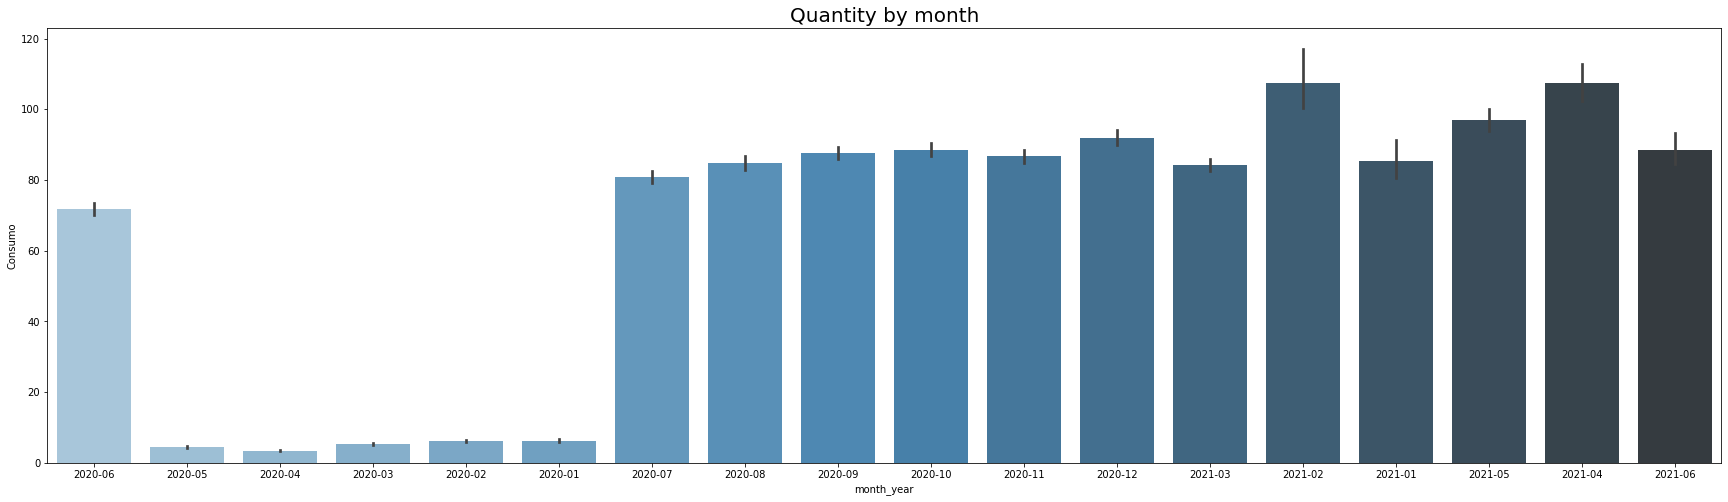

In [ ]:
f, ax = plt.subplots(figsize=(30, 8))
ax = sns.barplot(x="month_year", 
                 y="Consumo", 
                 data=df,
                 palette="Blues_d")\
                .set_title("Quantity by month",fontsize=20)

In [ ]:
df["id"] = df["Centro"] + df["Sku"]
df.set_index('id', inplace=True)

In [ ]:
df_12m = df[(df['Data'] > '2021-01-01') & \
                                   (df['Data'] <= '2021-05-31')]

In [ ]:
df_units = df_12m.groupby(['id','Sku','Centro','month'])['Consumo'].sum().to_frame().reset_index()
df_units.sample(20)

,id,Sku,Centro,month,Consumo
2053,C00310010237,10010237,C003,5,603
33988,D05020003828,20003828,D050,3,1
38767,D47910008882,10008882,D479,5,1
3807,C00320003718,20003718,C003,5,3300
38858,D47910009175,10009175,D479,5,904
10533,D04310009901,10009901,D043,3,2
7784,D04310007343,10007343,D043,4,27600
37744,D47910000938,10000938,D479,5,85
40169,D47910014149,10014149,D479,3,20
26396,D04410015213,10015213,D044,1,708


In [ ]:
df_units = df_units.pivot(index='id', columns='month', values='Consumo')\
                           .add_prefix('m').reset_index().fillna(0)
df_units.head()

month,id,m1,m2,m3,m4,m5
0,C00310000109,0.0,11.0,8.0,18.0,2.0
1,C00310000110,3.0,32.0,17.0,24.0,38.0
2,C00310000115,2.0,12.0,6.0,8.0,12.0
3,C00310000116,9.0,18.0,37.0,26.0,43.0
4,C00310000122,0.0,0.0,0.0,0.0,1.0


In [ ]:
#df_units['avg_demand'] = df_units.iloc[:, 2:5].mean(axis=1)
#df_units['std_demand'] = df_units.iloc[:, 2:5].std(axis=1)
##df_units['total_demand'] = df_units.iloc[:, 2:5].sum(axis=1)
#df_units['cov_demand'] = df_units['std_demand'] / df_units['avg_demand']

In [ ]:
df_units['std_demand'] = df_units[['m1','m2','m3','m4','m5']].std(axis=1)
df_units = df_units.assign(total_demand = df_units['m1'] + df_units['m2'] + \
                                                 df_units['m3']+ df_units['m4']+ \
                                                 df_units['m5']
                                  )
df_units = df_units.assign(avg_demand = df_units['total_demand'] / 5 )
df_units['cov_demand'] = df_units['std_demand'] / df_units['avg_demand']

In [ ]:
df_units.sort_values(by='cov_demand', ascending=False).head(5)

month,id,m1,m2,m3,m4,m5,std_demand,total_demand,avg_demand,cov_demand
18457,SZ2330000960,0.0,1.0,0.0,0.0,0.0,0.447214,1.0,0.2,2.236068
16358,DA0420005684,0.0,0.0,1.0,0.0,0.0,0.447214,1.0,0.2,2.236068
10159,D47710009605,0.0,0.0,2.0,0.0,0.0,0.894427,2.0,0.4,2.236068
1434,D04310001166,0.0,4.0,0.0,0.0,0.0,1.788854,4.0,0.8,2.236068
4700,D04320003754,0.0,0.0,0.0,0.0,18.0,8.049845,18.0,3.6,2.236068


In [ ]:
df_units.sort_values(by='cov_demand', ascending=True).head(5)

month,id,m1,m2,m3,m4,m5,std_demand,total_demand,avg_demand,cov_demand
8291,D04430000497,1.0,1.0,1.0,1.0,1.0,0.0,5.0,1.0,0.0
5463,D04410001756,1.0,1.0,1.0,1.0,1.0,0.0,5.0,1.0,0.0
10467,D47710014275,1.0,1.0,1.0,1.0,1.0,0.0,5.0,1.0,0.0
8926,D05010009371,2.0,2.0,2.0,2.0,2.0,0.0,10.0,2.0,0.0
5410,D04410001221,1.0,1.0,1.0,1.0,1.0,0.0,5.0,1.0,0.0


In [ ]:
df_units['cov_demand'].min()

0.0

In [ ]:
df_units['cov_demand'].mean()

1.1344454402691642

In [ ]:
df_units['cov_demand'].max()

2.2360679774997902

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


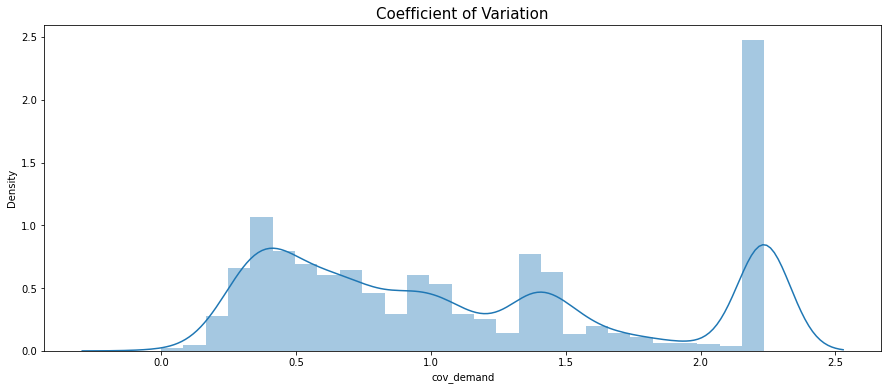

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(df_units['cov_demand']).set_title("Coefficient of Variation",fontsize=15)

In [ ]:
def xyz_classify_product(cov):
    """Apply an XYZ classification to each product based on 
    its coefficient of variation in order quantity.

    :param cov: Coefficient of variation in order quantity for SKU
    :return: XYZ inventory classification class
    """

    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [ ]:
df_units['xyz_class'] = df_units['cov_demand'].apply(xyz_classify_product)
df_units.xyz_class.value_counts()

Z    8863
Y    5134
X    4461
Name: xyz_class, dtype: int64

In [ ]:
df_units.head()

month,id,m1,m2,m3,m4,m5,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,C00310000109,0.0,11.0,8.0,18.0,2.0,7.224957,39.0,7.8,0.926277,Y
1,C00310000110,3.0,32.0,17.0,24.0,38.0,13.627179,114.0,22.8,0.597683,Y
2,C00310000115,2.0,12.0,6.0,8.0,12.0,4.242641,40.0,8.0,0.530330,Y
3,C00310000116,9.0,18.0,37.0,26.0,43.0,13.794927,133.0,26.6,0.518606,Y
4,C00310000122,0.0,0.0,0.0,0.0,1.0,0.447214,1.0,0.2,2.236068,Z


In [ ]:
df_units.groupby('xyz_class').agg(
    total_skus=('id', 'nunique'),
    total_demand=('total_demand', 'sum'),    
    std_demand=('std_demand', 'mean'),      
    avg_demand=('avg_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_skus,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,4461,43700246.0,701.338485,1959.213002,0.358540
Y,5134,28926110.0,791.047865,1126.844955,0.735677
Z,8863,9387418.0,338.150880,211.833871,1.755972


In [ ]:
df_monthly = df_units.groupby('xyz_class').agg(
    m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
   )

df_monthly.head()

In [ ]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

,month,xyz_class,demand
0,m1,X,5361191.0
1,m1,Y,1820522.0
2,m1,Z,877233.0
3,m2,X,10290657.0
4,m2,Y,7745847.0


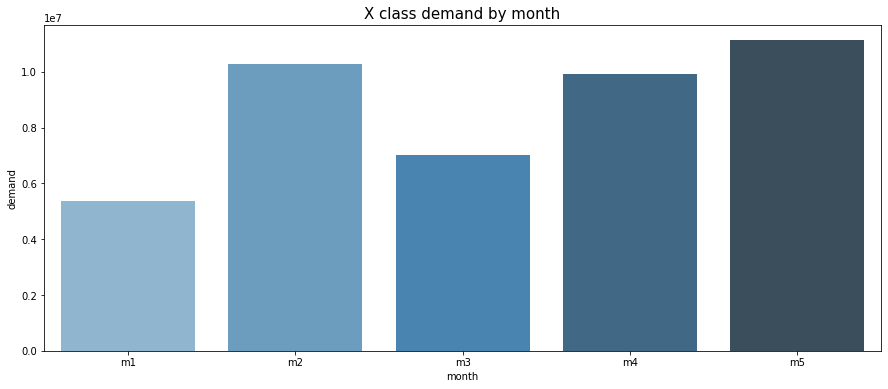

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='X'],
                 palette="Blues_d")\
                 .set_title("X class demand by month",fontsize=15)

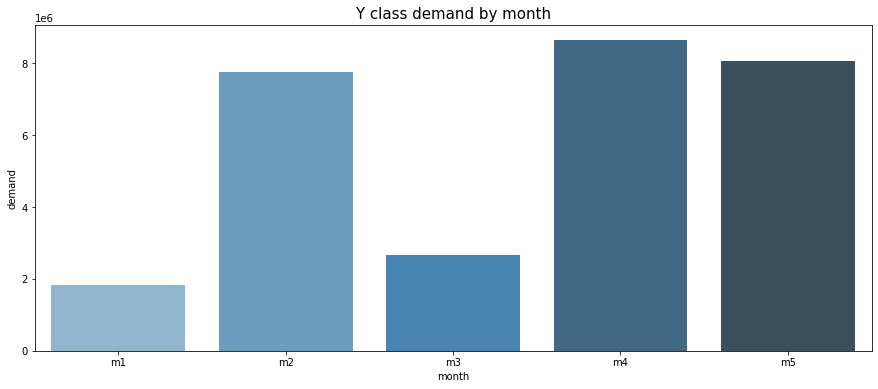

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Y'],
                 palette="Blues_d")\
                 .set_title("Y class demand by month",fontsize=15)

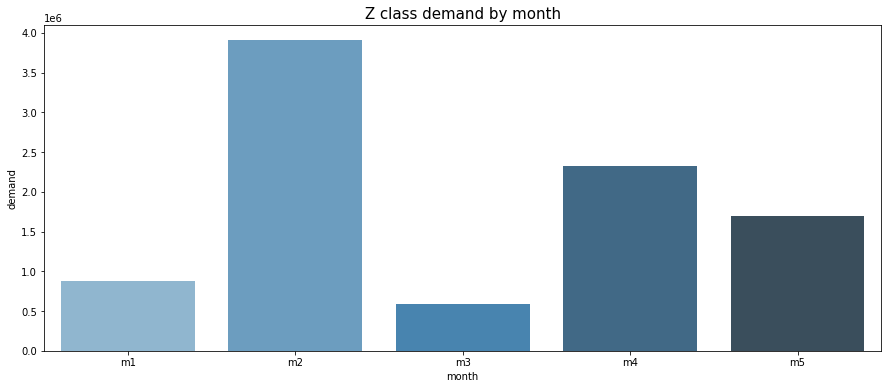

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Z'],
                 palette="Blues_d")\
                 .set_title("Z class demand by month",fontsize=15)

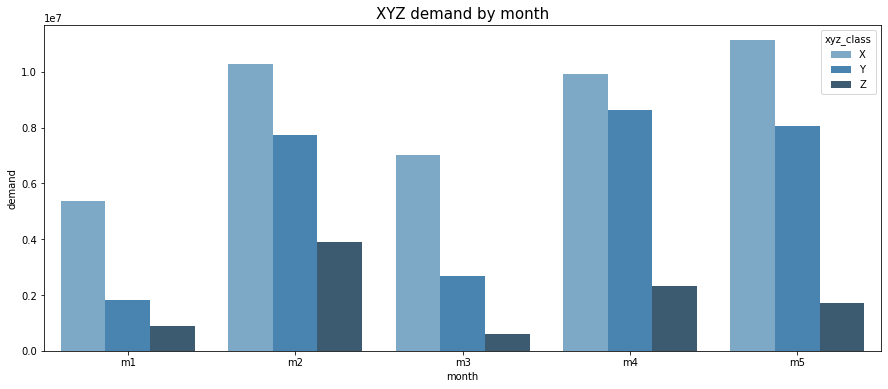

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 hue="xyz_class", 
                 data=df_monthly_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month",fontsize=15)

In [ ]:
df_skus = df_12m.groupby('id').agg(
    unique_purchases=('Sku', 'nunique'),
    total_units=('Consumo', 'sum'),
    total_revenue=('Receita', 'sum'),
).sort_values(by='total_revenue', ascending=False).reset_index()
#df_skus['unique_purchases'] = df_skus['id'].nunique()

In [ ]:
df_skus.head(-5)

,id,unique_purchases,total_units,total_revenue
0,D04310017740,1,768,33024000
1,D04410017516,1,8175,13734000
2,D04310017516,1,7298,12260640
3,D04310017245,1,515,8676322
4,D04310017484,1,995,8391373
...,...,...,...,...
18448,D04410014020,1,5,0
18449,G20810010639,1,82,0
18450,D04410010723,1,20,0
18451,D04410008854,1,43,0


In [ ]:
df_skus["Centro"]= df_skus['id'].str[:4]
df_skus["Sku"]= df_skus['id'].str[4:]

In [ ]:
df_skus.head()

,id,unique_purchases,total_units,total_revenue,Centro,Sku
0,D04310017740,1,768,33024000,D043,10017740
1,D04410017516,1,8175,13734000,D044,10017516
2,D04310017516,1,7298,12260640,D043,10017516
3,D04310017245,1,515,8676322,D043,10017245
4,D04310017484,1,995,8391373,D043,10017484


In [ ]:
df_skus['revenue_cumsum'] = df_skus.groupby('Centro')['total_revenue'].cumsum()

In [ ]:
df_skus['revenue_total'] = df_skus.groupby('Centro')['total_revenue'].transform(np.sum).fillna(value=0)

In [ ]:
df_skus['revenue_running_percentage'] = (df_skus['revenue_cumsum'] / df_skus['revenue_total']).fillna(value=0) * 100

In [ ]:
df_skus.sample(10)

,id,unique_purchases,total_units,total_revenue,Centro,Sku,revenue_cumsum,revenue_total,revenue_running_percentage
11277,G20810017374,1,3,801,G208,10017374,273011,329280,82.911504
8420,D04410018353,1,2,1986,D044,10018353,93836916,94785373,98.999364
13924,P02420002922,1,36,324,P024,20002922,2001913,2019347,99.136652
9021,D47710010689,1,438,1632,D477,10010689,8124070,8393320,96.792092
16610,D04410010790,1,345,73,D044,10010790,94777922,94785373,99.992139
9164,DA0410008837,1,57,1560,DA04,10008837,29403689,29718051,98.942185
1200,C00310016917,1,21671,56132,C003,10016917,24427115,31398175,77.797882
3335,D04410014780,1,80,13490,D044,10014780,88115466,94785373,92.963147
3550,D04420002936,1,795,12129,D044,20002936,88834409,94785373,93.721643
14751,D47710002242,1,1,225,D477,10002242,8374523,8393320,99.776048


In [ ]:
def abc_classify_product(percentage):
    """Apply an ABC classification to each product based on 
    its ranked percentage revenue contribution. Any split 
    can be used to suit your data. 

    :param percentage: Running percentage of revenue contributed
    :return: ABC inventory classification
    """

    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 90:
        return 'B'
    else:
        return 'C'

In [ ]:
df_skus['abc_class'] = df_skus['revenue_running_percentage'].apply(abc_classify_product)
df_skus['abc_rank'] = df_skus['revenue_running_percentage'].rank().astype(int)
df_skus.head()

,id,unique_purchases,total_units,total_revenue,Centro,Sku,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class,abc_rank
0,D04310017740,1,768,33024000,D043,10017740,33024000,206113545,16.022237,A,46
1,D04410017516,1,8175,13734000,D044,10017516,13734000,94785373,14.489577,A,40
2,D04310017516,1,7298,12260640,D043,10017516,45284640,206113545,21.970725,A,67
3,D04310017245,1,515,8676322,D043,10017245,53960962,206113545,26.180211,A,87
4,D04310017484,1,995,8391373,D043,10017484,62352335,206113545,30.251450,A,113


In [ ]:
df_abc = df_skus.groupby('abc_class').agg(
    total_skus=('id', 'nunique'),
    total_units=('total_units', sum),
    total_revenue=('total_revenue', sum),
).reset_index()

df_abc

,abc_class,total_skus,total_units,total_revenue
0,A,1798,51002711,353916955
1,B,1667,13560813,44506137
2,C,14993,17450250,44338147


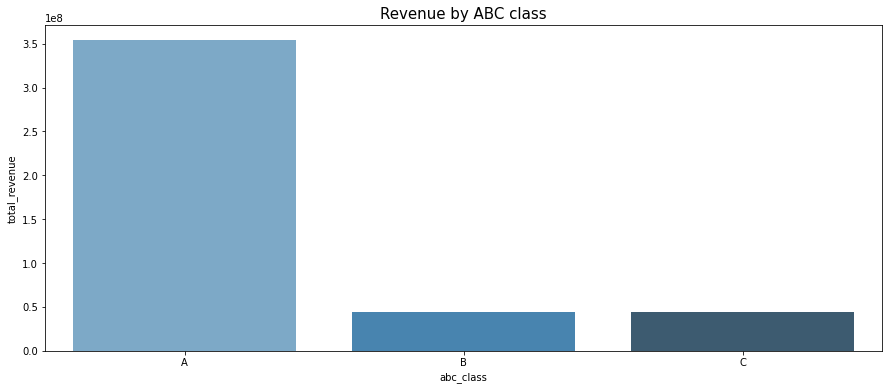

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_revenue", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Revenue by ABC class",fontsize=15)

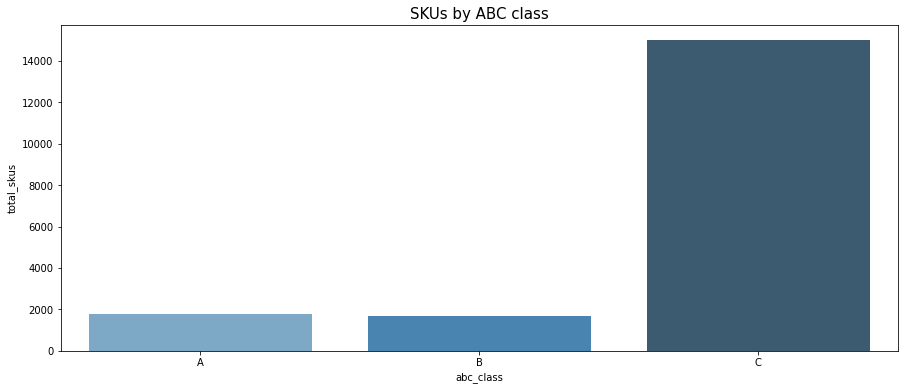

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_skus", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("SKUs by ABC class",fontsize=15)

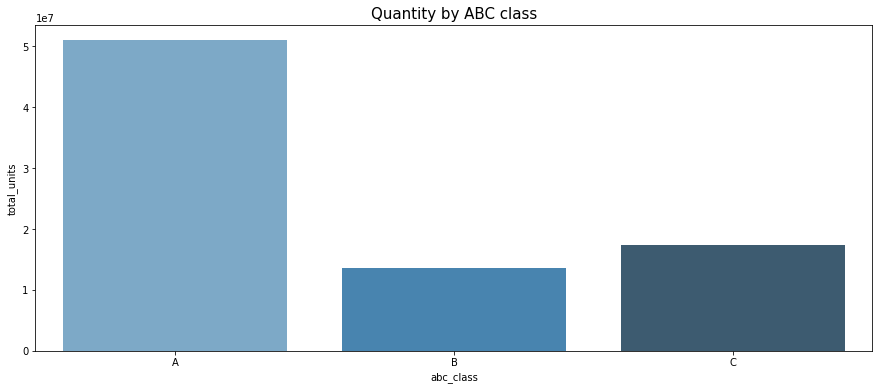

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_units", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Quantity by ABC class",fontsize=15)

In [ ]:
df_abc = df_skus[['id','abc_class','abc_rank','total_revenue']]
df_xyz = df_units.copy()
df_abc_xyz = df_abc.merge(df_xyz, on='id', how='left')
df_abc_xyz.head()

,id,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,D04310017740,A,46,33024000,155.0,39.0,85.0,139.0,350.0,118.982352,768.0,153.6,0.774625,Y
1,D04410017516,A,40,13734000,10.0,539.0,1576.0,1727.0,4323.0,1664.266355,8175.0,1635.0,1.017900,Z
2,D04310017516,A,67,12260640,972.0,1057.0,1006.0,631.0,3632.0,1225.917330,7298.0,1459.6,0.839900,Y
3,D04310017245,A,87,8676322,97.0,124.0,190.0,95.0,9.0,65.088401,515.0,103.0,0.631926,Y
4,D04310017484,A,113,8391373,163.0,263.0,219.0,240.0,110.0,62.036280,995.0,199.0,0.311740,X


In [ ]:
  df_abc_xyz['abc_xyz_class'] = df_abc_xyz['abc_class'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

In [ ]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_skus=('id', 'nunique'),
    total_demand=('total_demand', sum),
    avg_demand=('avg_demand', 'mean'),    
    total_revenue=('total_revenue', sum),    
).reset_index()

df_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_skus,total_demand,avg_demand,total_revenue
0,AX,902,28721794.0,6368.468736,141326721
1,AY,556,19943966.0,7174.088489,135148823
2,AZ,340,2336951.0,1374.677059,77441411
3,BX,771,8397721.0,2178.397147,25151153
6,CX,2788,6580731.0,472.075395,17779213
7,CY,4053,4523934.0,223.238786,14030168
8,CZ,8152,6345585.0,155.681673,12528766
4,BY,525,4458210.0,1698.365714,12406224
5,BZ,371,704882.0,379.990296,6948760


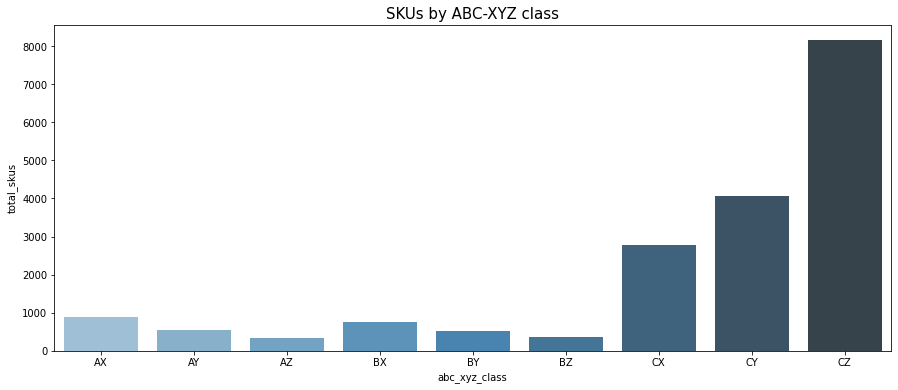

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_skus", 
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("SKUs by ABC-XYZ class",fontsize=15)

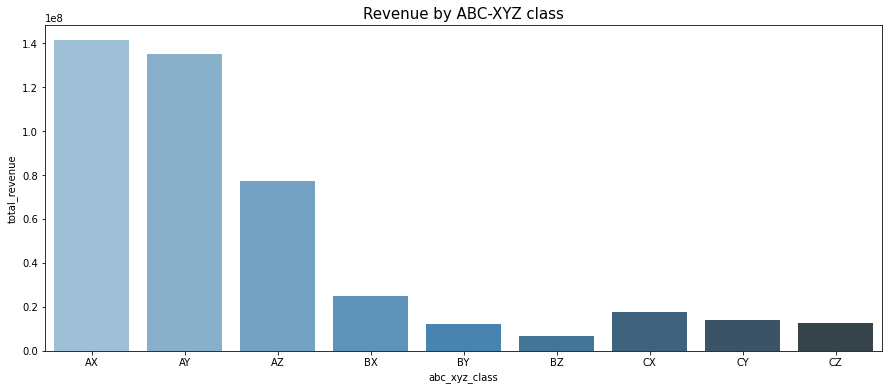

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_revenue", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Revenue by ABC-XYZ class",fontsize=15)

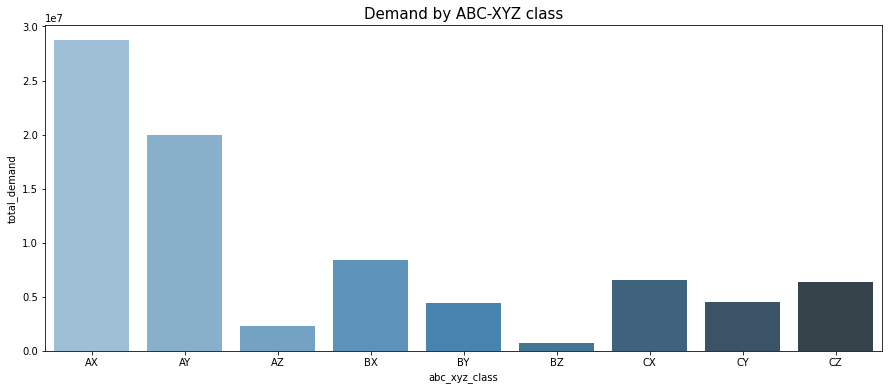

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_demand", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Demand by ABC-XYZ class",fontsize=15)

In [ ]:
results = df_abc_xyz

In [ ]:
results.head(-10)

,id,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,std_demand,total_demand,avg_demand,cov_demand,xyz_class,abc_xyz_class
0,D04310017740,A,46,33024000,155.0,39.0,85.0,139.0,350.0,118.982352,768.0,153.6,0.774625,Y,AY
1,D04410017516,A,40,13734000,10.0,539.0,1576.0,1727.0,4323.0,1664.266355,8175.0,1635.0,1.017900,Z,AZ
2,D04310017516,A,67,12260640,972.0,1057.0,1006.0,631.0,3632.0,1225.917330,7298.0,1459.6,0.839900,Y,AY
3,D04310017245,A,87,8676322,97.0,124.0,190.0,95.0,9.0,65.088401,515.0,103.0,0.631926,Y,AY
4,D04310017484,A,113,8391373,163.0,263.0,219.0,240.0,110.0,62.036280,995.0,199.0,0.311740,X,AX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18443,DB5610018972,C,11,0,0.0,0.0,0.0,416500.0,0.0,186264.462526,416500.0,83300.0,2.236068,Z,CZ
18444,DB5610018973,C,11,0,0.0,1000000.0,0.0,0.0,0.0,447213.595500,1000000.0,200000.0,2.236068,Z,CZ
18445,DB5610018975,C,11,0,0.0,1000000.0,0.0,250000.0,0.0,433012.701892,1250000.0,250000.0,1.732051,Z,CZ
18446,DB5610019110,C,11,0,0.0,0.0,0.0,31.0,0.0,13.863621,31.0,6.2,2.236068,Z,CZ


In [ ]:
results["Centro"]= results['id'].str[:4]
results["Sku"]= results['id'].str[4:]

In [ ]:
results = results.merge(inventory_category, left_on='abc_xyz_class', right_on='abc_xyz_class')

In [ ]:
results = results.merge(lista_nomes_centro, left_on='Centro', right_on='Centro')

In [ ]:
results = results.merge(lista_nomes_sku, left_on='Sku', right_on='Sku')

In [ ]:
results['Tipo']='Unidade'

In [ ]:
results.loc[results['Nome'].str.contains('ARMAZEM'), 'Tipo'] = 'Armazém'

In [ ]:
columnsTitles = ['id','Tipo','Centro','Nome','Sku','Descricao','m1','m2','m3','m4','m5','std_demand','total_demand','avg_demand','cov_demand','abc_class','abc_rank', 'xyz_class','abc_xyz_class','Comportamento de consumo','Comportamento de demanda','Confiabilidade da previsão','Modelo de abastecimento','Estoque de segurança','Controle do inventário']

results = results.reindex(columns=columnsTitles)

In [ ]:
results.head(-10)

,id,Tipo,Centro,Nome,Sku,Descricao,m1,m2,m3,m4,m5,std_demand,total_demand,avg_demand,cov_demand,abc_class,abc_rank,xyz_class,abc_xyz_class,Comportamento de consumo,Comportamento de demanda,Confiabilidade da previsão,Modelo de abastecimento,Estoque de segurança,Controle do inventário
0,D04310017740,Armazém,D043,ARMAZEM-SP,10017740,RGT CJ TAQPATH COVI APPLIED,155.0,39.0,85.0,139.0,350.0,118.982352,768.0,153.6,0.774625,A,46,Y,AY,Alto valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático com intervenção manual,"Baixo, risco de stock out aceito",Continuo
1,D04310017516,Armazém,D043,ARMAZEM-SP,10017516,SOL EXTRAC RNA PCR 3X96P 48T HYBRIBIO,972.0,1057.0,1006.0,631.0,3632.0,1225.917330,7298.0,1459.6,0.839900,A,67,Y,AY,Alto valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático com intervenção manual,"Baixo, risco de stock out aceito",Continuo
2,D04410017516,Armazém,D044,ARMAZEM-RJ,10017516,SOL EXTRAC RNA PCR 3X96P 48T HYBRIBIO,10.0,539.0,1576.0,1727.0,4323.0,1664.266355,8175.0,1635.0,1.017900,A,40,Z,AZ,Alto valor de consumo,Demanda intermitente ou variável,Previsão ímpossivel ou não confiável,Buy to order,Nenhum,Não estocado
3,D04310017245,Armazém,D043,ARMAZEM-SP,10017245,RGT SARS-COV-2 192T C6800/8800 ROCHE,97.0,124.0,190.0,95.0,9.0,65.088401,515.0,103.0,0.631926,A,87,Y,AY,Alto valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático com intervenção manual,"Baixo, risco de stock out aceito",Continuo
4,D04310017437,Armazém,D043,ARMAZEM-SP,10017437,RGT EXTR DNA/RNA VIRAL 300UL 960R PERKIN,57.0,63.0,46.0,28.0,10.0,21.764650,204.0,40.8,0.533447,A,152,Y,AY,Alto valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático com intervenção manual,"Baixo, risco de stock out aceito",Continuo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18721,G20810014551,Armazém,G208,ARMAZEM - PADRÃO,10014551,DISCO AZITROMICINA 15MCG C/50,0.0,0.0,0.0,0.0,1.0,0.447214,1.0,0.2,2.236068,C,17578,Z,CZ,Baixo valor de consumo,Demanda intermitente ou variável,Previsão ímpossivel ou não confiável,Automático,Alto,Inspeção periódica
18722,DB5610018861,Armazém,DB56,ARMAZEM-COVID19,10018861,RGT MOLECULAR SARS-COV-2 EDX BIO,2576.0,4896.0,0.0,3868.0,1404.0,1940.188444,12744.0,2548.8,0.761216,C,11,Y,CY,Baixo valor de consumo,Variação da demanda previsivel,Previsão menos confiável,Automático,Alto,Inspeção periódica
18723,DB5610003681,Armazém,DB56,ARMAZEM-COVID19,10003681,PL 96 POCOS RA 0.1ML C/24 APPLIED,15.0,0.0,0.0,0.0,0.0,6.708204,15.0,3.0,2.236068,C,11,Z,CZ,Baixo valor de consumo,Demanda intermitente ou variável,Previsão ímpossivel ou não confiável,Automático,Alto,Inspeção periódica
18724,DB5610017411,Armazém,DB56,ARMAZEM-COVID19,10017411,RGT EXTR DNA/RNA 96P PERKIN ELMER,180.0,0.0,0.0,330.0,180.0,140.071410,690.0,138.0,1.015010,C,11,Z,CZ,Baixo valor de consumo,Demanda intermitente ou variável,Previsão ímpossivel ou não confiável,Automático,Alto,Inspeção periódica


In [ ]:
 results.to_csv('inventory_classification.csv',sep=";",decimal=',')